<h1>Geo-bibliometrics</h1>
<h4>Integration of bibliographic openly accessible databases and location-, feature, and geographic-based search and discovery of scientific literature</h4>
<h3><font color = "Grey">Jacobs University Fall 2017</h3>
<h2><font color = "Grey">Jaeho Shin</h2>

<h2>My Plan for the Project</h2>
<ol>
    <li>Background</li>
    <li>Query Definition</li>
    <li>Query from ADS API</li>
    <li>Building Geo-Table with</li>
    <ol><li>Multi-polygon coordinates</li>
    <li>List of publications</li></ol>
    <li>Visualization Mapping of Geo-Table</li>
    <li>Data Observation</li>
    <li>Conclusion</li>
</ol>

In [2]:
from IPython.display import HTML
HTML('<iframe width="800" height="600" src="https://planetarynames.wr.usgs.gov/Feature/5931;jsessionid=B3FF5112EDAF5866E6836D2C05E63DD3" frameborder="0" allowfullscreen></iframe>')

<h1>Background</h1>
<ul>
<h3><li>The reason why I choose this topic</li></h3>
<h3><li>Object of Research</li></h3>
<h3><li>Query has scientific meaning</li></h3></ul>

<h1>Query Definition</h1>
<h2>Examples</h2>
<ul><li>Mars Landing Sites</li>
<li>Feature Type</li>
<ul><li>Plantia</li><li>Albedo</li><li>Collis</li><li>Vallis</li></ul>
<li>Topography</li><ul><li>Ridges</li><li>Plains</li><li>Mountains</li></ul>
</ul>

In [38]:
from IPython.display import HTML
HTML('<iframe width="800" height="600" src="https://www.google.com/mars/glossary.html" frameborder="0" allowfullscreen></iframe>')

<h1><font color = "grey">Query from ADS API</h1>
<h3><font color = "grey">an Example</h3>

In [36]:
import ads
ads.config.token = 'PMDPBZAsfvom5fAUBHynH5MGuN0MeoFCr5v0mkuf'
papers = ads.SearchQuery(keyword="landing sites mars", sort="citation_count")
for paper in papers:
    print(paper.title)

['The search for organic substances and inorganic volatile compounds in the surface of Mars']
['Inorganic Analyses of Martian Surface Samples at the Viking Landing Sites']
['Mineralogic and Petrologic Implications of Viking Geochemical Results From Mars: Interim Report']
['Viking landing sites, remote-sensing observations, and physical properties of Martian surface materials']
['Soil and Surface Temperatures at the Viking Landing Sites']
['Preliminary Results from the Viking Orbiter Imaging Experiment']
['Geology of Chryse Planitia']
['Selection of the Mars Science Laboratory Landing Site']
['Viking Labeled Release Biology Experiment: Interim Results']
['The Surface of Mars: The View from the Viking 2 Lander']
['Search for the Viking 2 Landing Site']
['Are the Viking Lander sites representative of the surface of Mars?']
['Geological observations in the Cydonia region of Mars from Viking']
['The Viking Landing Sites: Selection and Certification']
['Radar Characteristics of Viking 1 Land

<h1>Building Geo-Table with</h1>
<ul><li>Multi-polygon coordinates</li>
<li>List of publications</li></ul></ul>

In [19]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import ogr
#%pylab inline

#send feature name
name = "Bahram Vallis"
name =  "1302" #Olympus Mons - Method can't handle spaces. Requested a fix

#IAU nomenclture URL
urlIAU = "https://planetarynames.wr.usgs.gov/Feature/"
url = urlIAU + name
print ("url to call: " + url)

#request html page from USGS gaz.
r = requests.get(url)
data = r.text
soup = BeautifulSoup(data, "lxml")
feature_panel = soup.findAll('table', {'class': 'feature_detail'})
for feature in feature_panel:
    try:
        name = feature.find('h2').text
        print ("feature found: " + name)
    except AttributeError:
        continue
list1 = soup.body.findAll(text=re.compile('MULTIPOLYGON'))

url to call: https://planetarynames.wr.usgs.gov/Feature/1302
feature found: Coprates Chasma


In [22]:
str1 = ''.join(list1)
#print alist
splitList = str1.split('\n')
for item in splitList:
    if item.find("MULTIPOLYGON") != -1:
        geomStr = item.split('\'')[1]
geomOGR = ogr.CreateGeometryFromWkt(geomStr)
from matplotlib import pylab
import json

Populating the interactive namespace from numpy and matplotlib


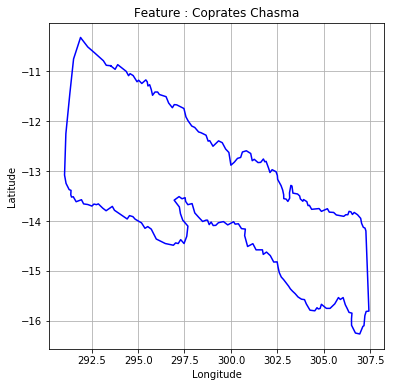

In [31]:
%pylab inline
figsize(6,6)
coords = json.loads(geomOGR.ExportToJson())['coordinates'][0]
x = [i for i,j in coords[0]]
y = [j for i,j in coords[0]]

plot(x, y, 'b')
pylab.xlabel('Longitude')
pylab.ylabel('Latitude')
pylab.title('Feature : ' + name)
grid()

In [3]:
from IPython.display import HTML
HTML('<iframe width="800" height="600" src="https://shinjjo.carto.com/builder/e90660bf-7882-400b-be20-c35ed8c8ffc2/embed" frameborder="0" allowfullscreen></iframe>')

<h2><font color = "grey">What am I going to do</h2>
<ol>
    <li>Building Geo-Table with</li>
    <ol><li>Multi-polygon coordinates</li>
    <li>List of publications</li></ol>
    <li>Visualization Mapping of Geo-Table</li>
    <li>Data Observation</li>
</ol>

<h1>What I am Struggling</h1>
<ul>
<li>Converting Polygon Coordinates to geojson format</li>
<li>Mapping Polygon coordinates</li>